<a href="https://colab.research.google.com/github/FelipeOcampo03/ClasificaciondeTumores/blob/main/ProyectoClasificacionTumores_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preproceso

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')
import cv2
import glob, os.path
from google.colab.patches import cv2_imshow }
import matplotlib.pyplot as plt
import numpy as np
import h5py
from PIL import Image
from skimage import data, filters, measure
from skimage.filters import threshold_multiotsu

for i in range(1,3063):

  a +=1
  j= str(a)
  f = h5py.File(path1 + str(i)+'.mat','r')


  cjdata = f['cjdata'] #<HDF5 group "/cjdata" (5 members)>

  image = np.array(cjdata.get('image')).astype(np.float64)

  label = cjdata.get('label')[0,0]

  tumorMask = np.array(cjdata.get('tumorMask'))

  f.close()

  data_i = np.array(image) # For converting to numpy array
  img = np.transpose(data_i)
  img_conv = cv2.convertScaleAbs(img, alpha=(255.0/(np.max(img))))
  imgcopia = cv2.convertScaleAbs(img, alpha=(255.0/(np.max(img))))
  imgcopia = cv2.cvtColor(imgcopia, cv2.COLOR_BGRA2BGR)
  data_i_1 = np.array(tumorMask) # For converting to numpy array
  img_1 = np.transpose(data_i_1)
  Mask = cv2.convertScaleAbs(img_1, alpha=(255.0/(np.max(img_1))))
  dest_not = cv2.bitwise_not(Mask, mask = None)
  contours, _ = cv2.findContours(dest_not, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(imgcopia, contours, -1, (255, 0, 0), 4, cv2.LINE_AA)

#Save as jpg

  cv2.imwrite(os.path.join('/content/Drive/My Drive/DataBase/'+ str(int(label)) + "/", j +".jpg"),imgcopia)

## Libraries

In [ ]:
import cv2
import numpy as np
import os
from keras.utils import to_categorical  #Redes neuronales IMAGENET Transferencia de aprendizaje
from sklearn.model_selection import train_test_split
import time as tm
import numpy as np
import time
import time as tm

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#Model
import tensorflow as tf #Use tensorflow + keras
from keras.wrappers.scikit_learn import KerasClassifier #Modelación computacional
from sklearn.base import BaseEstimator #Estimación

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!nvidia-smi

Mon Mar  8 21:29:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Function to get data from the folders

In [ ]:
def get_data(folder,size_image):
    print('\nLoading images...')
    X = [] #Arreglo de imagenes
    y = [] #Etiquetas
    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['1']:
                label = '0'
            elif wbc_type in ['2']:
                label = '1'
            else:
                label = '2'
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = cv2.resize(img_file, dsize=(size_image, size_image), interpolation=cv2.INTER_CUBIC)
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    print('...\nImages loaded!')
    return X,y


## Loading images

In [ ]:
#Define the paths for the images datasets, 'Train' and 'Test' data
path_train = '/content/drive/My Drive/DataBase/Train'
path_test  = '/content/drive/My Drive/DataBase/Test'

size_image = 224 #Resize valor con el cual ellos hicieron el entrenamiento de la red en la base de datos en imagenet
#Loading images datasets, you need put the images folder

start_time = tm.time() #Tiempo de espera
X_train, y_train = get_data(path_train+'/',size_image)
TIME = tm.time() - start_time
print("Time image by image "+str(size_image)+" = %s [seconds]" % int(TIME))

start_time = tm.time()
X_test,  y_test  = get_data(path_test+'/',size_image) #get data #entretamiento y testeo, esta 2 veces
TIME = tm.time() - start_time
print("Time image by image "+str(size_image)+" = %s [seconds]" % int(TIME))

#X_train_F = np.load('/content/drive/My Drive/Covid19/IMG_npy/16_bits/COVID/X_train_COVID_1CH.npy')
#X_dev_F = np.load('/content/drive/My Drive/Covid19/IMG_npy/16_bits/COVID/X_dev_COVID_1CH.npy')
#X_test_F = np.load('/content/drive/My Drive/Covid19/IMG_npy/16_bits/COVID/X_test_COVID_1CH.npy')
###cargar el archivo np.load

#y_train_F=np.array([[1,0]]*len(X_train_F))
#y_dev_F=np.array([[1,0]]*len(X_dev_F))
#y_test_F=np.array([[1,0]]*len(X_test_F))

#Convert to categorical the labels for the Convolutional Neural Networks in Softmax function
y_train = to_categorical(y_train, 2) #Generar etiquetas asignar el numero maximo de etiquetas
y_test  = to_categorical(y_test, 2)

#Controled randomized data for training
X_dat0, X_dat1, y_dat0, y_dat1 = train_test_split(X_train, y_train, test_size=0.50, random_state=32)
X_train = np.concatenate([X_dat0,X_dat1],axis=0)
y_train = np.concatenate([y_dat0,y_dat1],axis=0)

#Visualizing the shape of dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


Loading images...
...
Images loaded!
Time image by image 224 = 59 [seconds]

Loading images...
...
Images loaded!
Time image by image 224 = 18 [seconds]
(1269, 224, 224, 3)
(423, 224, 224, 3)
(1269, 3)
(423, 3)


##Modelo

In [ ]:
!pip install -U git+https://github.com/qubvel/efficientnet #Red con memoria con los pesos (memoria) Red efficenet
import keras
from keras.models import Model #Crear el modelo
from keras.layers import Dense, Dropout #Dense para fulliconected capa conectada, Dropout Apagones de neurones y evitar el sobre entrenamiento
from keras.optimizers import Adam #Optimizador agilizar procesamiento, memoria, etc
import efficientnet.keras as enet #Se cargara el modelo

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-y6t7tq6o
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-y6t7tq6o
     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for efficientnet: filename=efficientnet-1.1.1-cp36-none-any.whl size=18421 sha256=cca9f33be2276d72762c5f8c7fa461aee3364be713cfcbec9c6290d5ef4bbc91
  Stored in directory: /tmp/pip-ephem-wheel-cache-tdvzpp4j/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet


In [ ]:
class KerasBatchClassifier(KerasClassifier, BaseEstimator): #Crear Graficas, clase para crear variar funciones
    def __init__(self, model, **kwargs):
        super().__init__(model)
        self.fit_kwargs = kwargs
        self._estimator_type = 'classifier'

    def fit(self, x, y, *args, **kwargs):
        y = np.array(y)
        if len(y.shape) == 2 and y.shape[1] > 1:
          self.classes_ = np.arange(y.shape[1])
        elif (len(y.shape) == 2 and y.shape[1] == 1) or len(y.shape) == 1:
          self.classes_ = np.unique(y)
          y = np.searchsorted(self.classes_, y)
        else:
          raise ValueError('Invalid shape for y: ' + str(y.shape))
        self.n_classes_ = len(self.classes_)
        return super(KerasClassifier, self).fit(x, y, **self.fit_kwargs)
#Se tiene la red ya entrada con la adaptación del problema
def ModelCNN_EFFICIENTNETB7NS(size_image): #Red entrenada y la adapto para clasificar 3 cosas #weights memoria entrenada en la base de datos
    model = enet.EfficientNetB7(include_top=False, input_shape=(size_image,size_image,3), pooling='avg', weights='noisy-student') #Adquieren la red neuronal entrenada
    x = model.output #Difinir la salida  #Pooling agrupadores de datos, se busca que sea mas eficiente, caracteristicas por promedio de cada imagen solo cambios promedio
    layers = Dense(128,activation="relu")(x)
    layers = Dropout(0.2)(layers) #Evitar el overfitting
    layers = Dense(64 ,activation="relu")(layers)
    layers = Dropout(0.2)(layers)
    x = Dense(32 ,activation="relu")(layers) #Pocas neuronas
    predictions = Dense(2, activation="sigmoid")(x) #LLegar a 3 neuronas
    model_final = Model(inputs = model.input, outputs = predictions)
    model_final.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy']) #Funcion de perdida para hacerla decreciente y optimizador ganancia y sea ascendente
    return model_final


## Train the model independently for each size

In [ ]:
def Acc_Loss_Curves(model,size_image,epochs,batch_size): #Curvas
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    start_time = tm.time()
    history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),verbose=2)
    TIME = tm.time() - start_time
    print("Time "+str(size_image)+" size data = %s [seconds]" % int(TIME))

    with plt.style.context('seaborn-white'):  #Color
        plt.figure(figsize=(10, 10))
        #Plot training & validation accuracy values
        plt.plot(np.concatenate([np.array([accuracyTRAIN]),np.array(history.history['accuracy'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyTEST]), np.array(history.history['val_accuracy'])],axis=0))
        plt.title('Accuracy Vs Epoch')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.grid('on')
        plt.savefig("/content/drive/My Drive/DataBase/Figuras2/"+str(size_image)+"_CNN_ACC.pdf", format='pdf')
        plt.savefig("/content/drive/My Drive/DataBase/Figuras2/"+str(size_image)+"_CNN_ACC.eps", format='eps')
        plt.savefig("/content/drive/My Drive/DataBase/Figuras2/"+str(size_image)+"_CNN_ACC.svg", format='svg')
        plt.show()

        plt.figure(figsize=(10, 10))
        #Plot training & validation loss values
        plt.plot(np.concatenate([np.array([lossTRAIN]),np.array(history.history['loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossTEST]), np.array(history.history['val_loss'])],axis=0))
        plt.title('Loss Vs Epoch')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.grid('on')
        plt.savefig("/content/drive/My Drive/DataBase/Figuras2/"+str(size_image)+"_CNN_LOSS.pdf", format='pdf')
        plt.savefig("/content/drive/My Drive/DataBase/Figuras2/"+str(size_image)+"_CNN_LOSS.eps", format='eps')
        plt.savefig("/content/drive/My Drive/DataBase/Figuras2/"+str(size_image)+"_CNN_LOSS.svg", format='svg')
        plt.show()


In [ ]:
model = ModelCNN_EFFICIENTNETB7NS(size_image)
model.summary()

258072576/258068648 [==============================] - 6s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 64) 0           stem_bn[0][0]                    
____________________

258072576/258068648 [==============================] - 7s 0us/step
Epoch 1/12
80/80 - 74s - loss: 1.0234 - accuracy: 0.5099 - val_loss: 0.9045 - val_accuracy: 0.5366
Epoch 2/12
80/80 - 75s - loss: 0.5117 - accuracy: 0.8345 - val_loss: 0.7412 - val_accuracy: 0.8038
Epoch 3/12
80/80 - 76s - loss: 0.2455 - accuracy: 0.9228 - val_loss: 0.2595 - val_accuracy: 0.9314
Epoch 4/12
80/80 - 75s - loss: 0.1723 - accuracy: 0.9519 - val_loss: 0.1342 - val_accuracy: 0.9598
Epoch 5/12
80/80 - 75s - loss: 0.1618 - accuracy: 0.9425 - val_loss: 0.3082 - val_accuracy: 0.9409
Epoch 6/12
80/80 - 75s - loss: 0.1510 - accuracy: 0.9567 - val_loss: 0.1495 - val_accuracy: 0.9598
Epoch 7/12
80/80 - 75s - loss: 0.0955 - accuracy: 0.9685 - val_loss: 0.1805 - val_accuracy: 0.9551
Epoch 8/12
80/80 - 76s - loss: 0.0740 - accuracy: 0.9803 - val_loss: 0.2259 - val_accuracy: 0.9504
Epoch 9/12
80/80 - 76s - loss: 0.0687 - accuracy: 0.9795 - val_loss: 0.1840 - val_accuracy: 0.9716
Epoch 10/12
80/80 - 76s - loss: 0.0553 - a

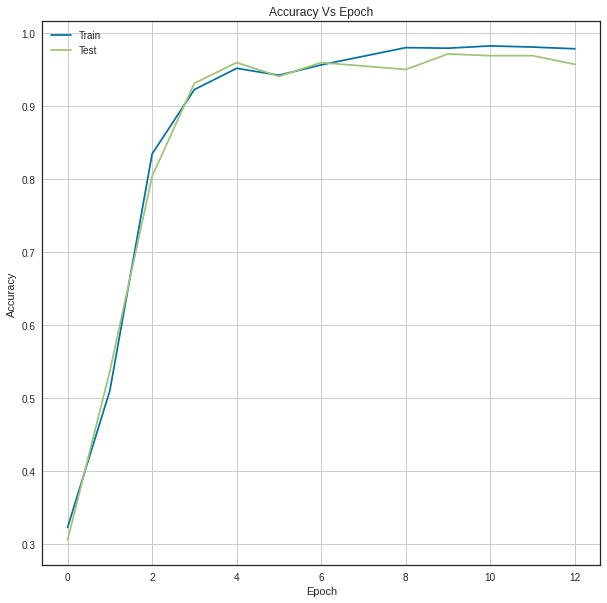

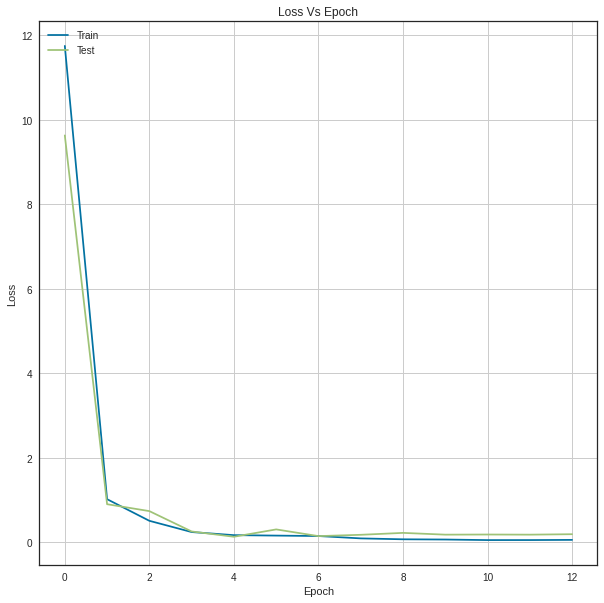

In [ ]:
#Define the image size and model
size_image = 224
epochs     = 12
batch_size = 16
model = ModelCNN_EFFICIENTNETB7NS(size_image)

#Define the dataset
X_train = X_train
X_test  = X_test
y_train = y_train
y_test  = y_test

#Trainint and plot the Accuracy and Loss Curves
Acc_Loss_Curves(model, size_image, epochs, batch_size)

##Medir Precisión

In [ ]:
from sklearn.metrics import accuracy_score
print('Predicting on test data')
y_pred = np.rint(model.predict(X_test))
print(accuracy_score(y_test, y_pred))

Predicting on test data
0.9574468085106383
